In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   CustomerID  Gender  Age Geography  Tenure  Balance  NumOfProducts  \
0           1    Male   38   Germany       3     9078              1   
1           2  Female   49     Spain       3   156075              4   
2           3    Male   40    France       4    62768              2   
3           4    Male   50     Spain       5    51047              4   
4           5    Male   20    France       4    71626              3   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1            90028       1  
1          1               0            42207       0  
2          1               1           100650       0  
3          0               0           119821       1  
4          1               1           101554       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       500 non-null  

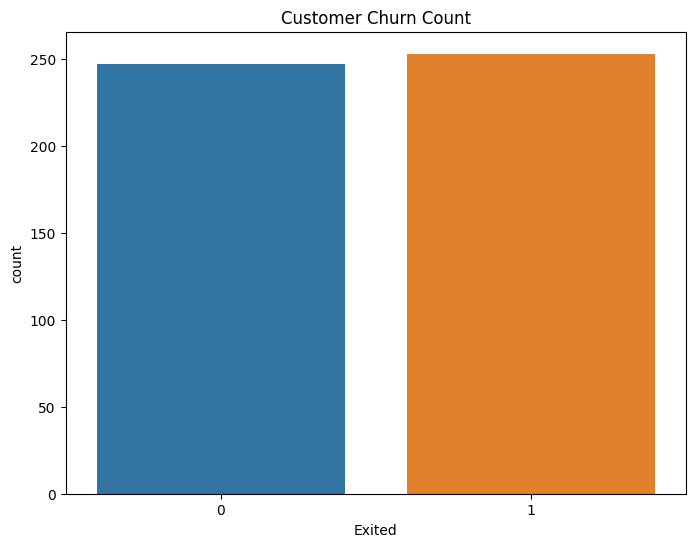

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


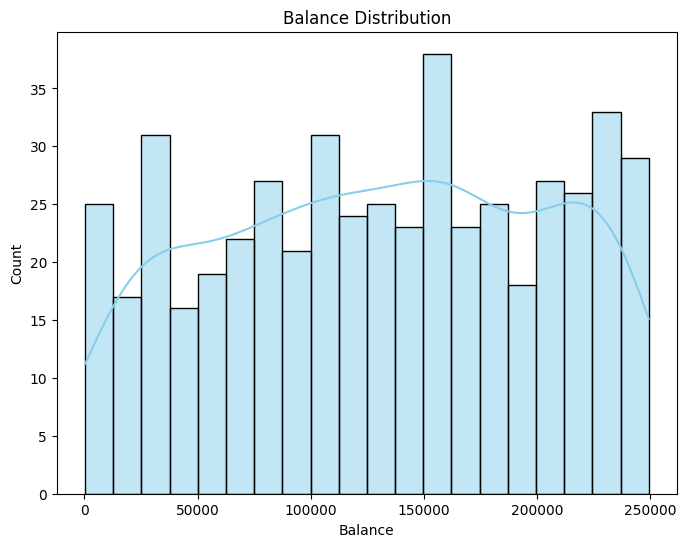

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

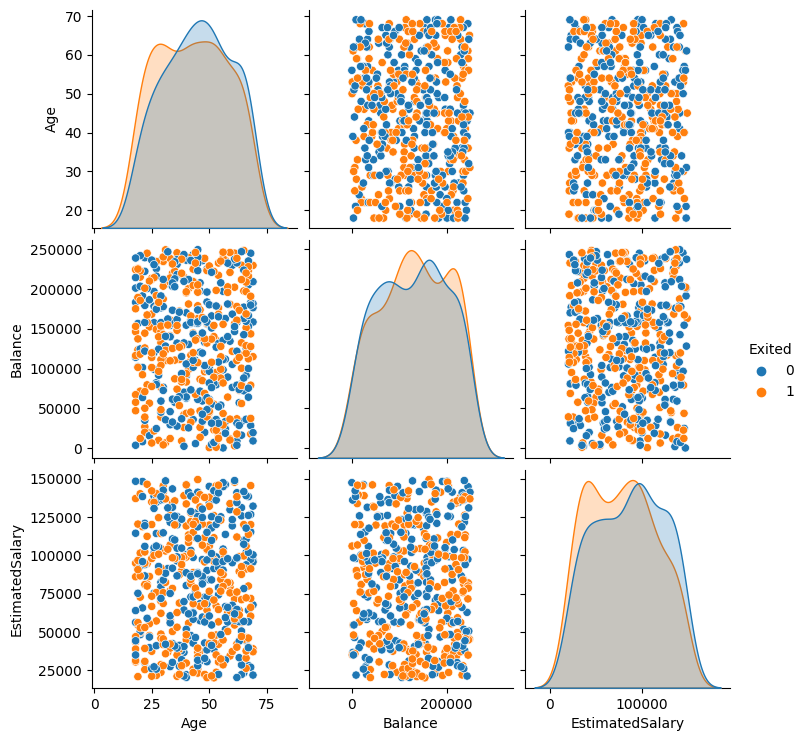

Accuracy: 0.49
Confusion Matrix:
 [[17 34]
 [17 32]]


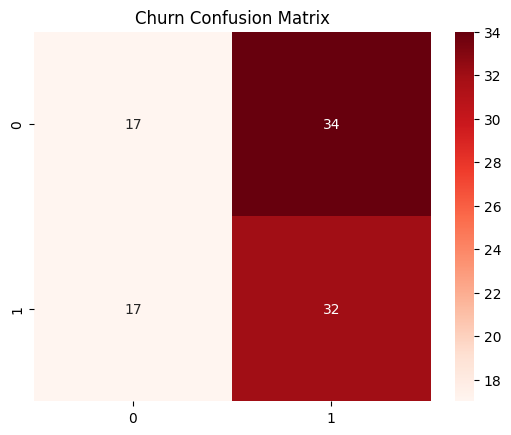

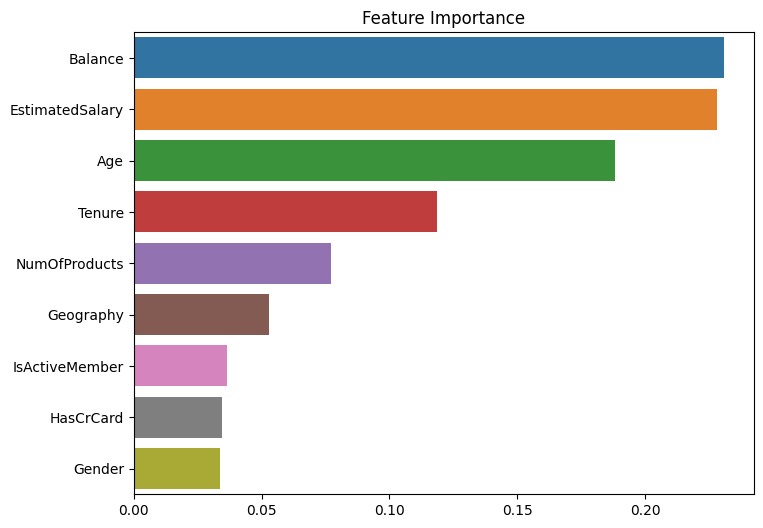

In [2]:
# Task 3: Customer Churn Prediction (Simulated Dataset)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Simulate a bank customer dataset
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'CustomerID': range(1, n+1),
    'Gender': np.random.choice(['Male','Female'], n),
    'Age': np.random.randint(18, 70, n),
    'Geography': np.random.choice(['France','Spain','Germany'], n),
    'Tenure': np.random.randint(0, 10, n),
    'Balance': np.random.randint(0, 250000, n),
    'NumOfProducts': np.random.randint(1, 5, n),
    'HasCrCard': np.random.choice([0,1], n),
    'IsActiveMember': np.random.choice([0,1], n),
    'EstimatedSalary': np.random.randint(20000, 150000, n),
    'Exited': np.random.choice([0,1], n)  # 1 = Customer left
})

# Overview
print(df.head())
print(df.info())

# Encode categorical variables
le = LabelEncoder()
for col in ['Gender','Geography']:
    df[col] = le.fit_transform(df[col])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.countplot(x='Exited', data=df)
plt.title("Customer Churn Count")
plt.savefig('churn_count.png')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['Balance'], bins=20, kde=True, color='skyblue')
plt.title("Balance Distribution")
plt.savefig('balance_distribution.png')
plt.show()

# Pairplot for key features
pairplot_fig = sns.pairplot(df[['Age','Balance','EstimatedSalary','Exited']], hue='Exited')
pairplot_fig.savefig('churn_pairplot.png')
plt.show()

# Features and target
X = df.drop(['CustomerID','Exited'], axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# Confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Churn Confusion Matrix")
plt.savefig('churn_confusion_matrix.png')
plt.show()

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=importances.index)
plt.title("Feature Importance")
plt.savefig('churn_feature_importance.png')
plt.show()